## Correlation between lowercase_200000 model input and output length

In [9]:
import seaborn as sns
import pandas as pd

In [2]:
with open('output/small_lowercase-model_epoch1_21.47.t7.pred.txt') as f:
    output = [x.strip() for x in f.readlines()]

In [3]:
with open('data/test/src-test.txt') as f:
    src = [x.strip() for x in f.readlines()]

In [10]:
input_len = [len(x) for x in src]
output_len = [len(y) for y in output]

data = pd.DataFrame({'input_len': input_len, 'output_len': output_len})

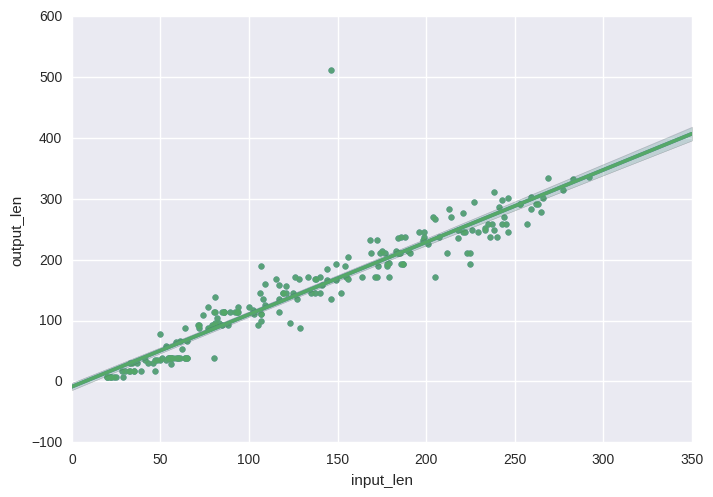

In [12]:
sns.regplot(x="input_len", y="output_len", data=data)
sns.plt.show()


Quite clearly, the RNN model has learned to generate about as many tokens than what's in the input.

In [17]:
### What's this outlier on the top?

In [13]:
max(output_len)

511

In [14]:
output_len.index(511)

127

In [15]:
output[127]

'@justinbieber [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ ['

In [16]:
src[127]

"@justinbieber|@|_ I'm|L|_ a|D|_ big|A|_ fan|N|CONJ of|P|_ yours|O|_ and|&|_ admire|V|CONJ your|D|_ work|N|_ ,|,|_ follow|V|_ me|O|_ ?|,|_ [/35|G|_"

I honestly have no idea why the model went crazy like that